###Amadeus datasets
bookings.csv
searches.csv

####First exercise: count the number of lines in Python for each file



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from GeoBases import GeoBase

In [1]:
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv')

print "First exercice: Count the number of lines in Python for each files."

print "\n[bookings.csv]: ", len(f.readlines()), " lines."

f.close()
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/searches.csv')

print "\n[searches.csv]: ", len(f.readlines()), " lines."
f.close()

First exercice: Count the number of lines in Python for each files.

[bookings.csv]:  10000011  lines.

[searches.csv]:  20390199  lines.


####Second exercise: top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport
To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
Print the top 10 arrival airports in the standard output, including the number of passengers.




#####1.Exploring the csv file


In [2]:
f = open('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv')
h = f.readline()
print h
f.close()

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      



the separator of the csv file is '^'

In [4]:
header = str.split(h, '^')
print header, "\n number of columns: " , len(header)

['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ', 'rloc          ', 'cre_date           ', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class', 'brd_time           ', 'off_time           ', 'pax', 'year', 'month', 'oid      \n'] 
 number of columns:  38


#####2.import the csv file into a DataFrame

In [5]:
data = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/bookings.csv', delimiter='^', header=0)

print "Number of rows in data: %i" % data.shape[0]
print "\nNumber of columns in data: %i" % data.shape[1]

data.head()

data.pax.describe()

Number of rows in data: 10000010

Number of columns in data: 38


C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


count    10000009.000000
mean            0.490880
std             2.199173
min           -90.000000
25%            -1.000000
50%             1.000000
75%             1.000000
max            99.000000
Name: pax, dtype: float64

count of pax is 10000009 instead of 10000010; one value is missing !

In [6]:
data[data.pax.isnull()]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5000007,2013-03-25 00:00:00,1V JP,NaN,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,...,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL,NaN,NaN,NaN,NaN


the row 5000007 seems problematic

#####3.Fixing the malformed row

In [7]:
data[5000006:5000008]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5000006,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
5000007,2013-03-25 00:00:00,1V JP,NaN,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,...,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL,NaN,NaN,NaN,NaN


The source contains both the source and the pos_ctry data.And rloc, pos_iod, bkg_class and cab_class seems to be missing.
I have collected the malformed row using:
head -n 5000009 bookings.csv | tail
 then edited the missing separator in gedit
 the resulting row and header is saved in malformedRow.csv

In [8]:
malformedRow = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/malformedRow.csv', delimiter='^', header=0)
data.drop(data.index[[5000007]], inplace=True)
data = data.append(malformedRow, ignore_index=True)


Then the pax column seems complete

In [9]:
data.pax.describe()

count    10000010.000000
mean            0.490881
std             2.199173
min           -90.000000
25%            -1.000000
50%             1.000000
75%             1.000000
max            99.000000
Name: pax, dtype: float64

#####4.Computing the number of passengers per arrival airport

In [12]:
sum_pax_by_arr_port= data.groupby('arr_port').pax.sum()

sum_pax_by_arr_port_ordered = sum_pax_by_arr_port.order(ascending=False)
top10=sum_pax_by_arr_port_ordered.head(n=10)
print(top10)

arr_port
LHR         88809
MCO         70930
LAX         70530
LAS         69630
JFK         66270
CDG         64490
BKK         59460
MIA         58150
SFO         58000
DXB         55590
Name: pax, dtype: float64


#####Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

First, I convert the top10 list into a dataframe to store the names of the airports

In [13]:
df = pd.DataFrame(top10)
df['arr_port']=df.index
print df

            pax  arr_port
arr_port                 
LHR       88809  LHR     
MCO       70930  MCO     
LAX       70530  LAX     
LAS       69630  LAS     
JFK       66270  JFK     
CDG       64490  CDG     
BKK       59460  BKK     
MIA       58150  MIA     
SFO       58000  SFO     
DXB       55590  DXB     


Then get the names from GeoBases

In [14]:
geo_o = GeoBase(data='airports')

airport_names = [geo_o.get(row.strip(), 'name') for row in df.arr_port]
df['airport_names']=airport_names

print "Top 10 arrival airports :\n", df


Import successful from C:\Users\Michael\AppData\Roaming\Python\Python27\site-packages\geobases-5.0.16-py2.7.egg\GeoBases\DataSources\Airports/GeoNames/airports_geonames_only_clean.csv
Available fields for things: ['__key__', '__dup__', '__par__', '__lno__', 'iata_code', 'name', 'city_code', 'country_code', 'country_name', 'lat', 'lng', '__gar__']
(Join) loaded external base "countries" [with ('code',)] for join on ('country_code',)
Built index for fields ('code',)
(Join) loaded external base "ori_por" [with ('iata_code',)] for join on ('city_code',)
/!\ Index on ('iata_code',) already built, exiting...
Top 10 arrival airports :
            pax  arr_port                         airport_names
arr_port                                                       
LHR       88809  LHR                    London Heathrow Airport
MCO       70930  MCO              Orlando International Airport
LAX       70530  LAX          Los Angeles International Airport
LAS       69630  LAS             McCarran In

####Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

#####1.Get the IATA code from the name of the airports

In [16]:
geo_o.fuzzyFind('Malaga','name')[0]

(0.9, 'AGP')

In [17]:
geo_o.fuzzyFind('Madrid','name')[0]

(0.9, 'MAD')

In [18]:
geo_o.fuzzyFind('Barcelona','name')[0]

(0.9, 'BCN')

In [23]:
Malaga='AGP'
Madrid='MAD'
Barcelona='BCN'

#####2.Create a month column in the searches dataframe

In [19]:
searches = pd.read_csv('C:/Users/Michael/Desktop/Amadeus_dataset/searches.csv', delimiter='^', header=0)
searches.head()

C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


We can extract the month of the search from the Date column

In [20]:
date_str=[str(row) for row in searches.Date]
months = [int(dt_str.split('-')[1]) for dt_str in date_str]
searches['Month']=months

In [21]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Month
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,1
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,1
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,1
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,1


#####3.Destination searches grouped by month

In [24]:
tbl_Malaga=searches[searches['Destination']==Malaga].groupby('Month').count().iloc[:,0]
tbl_Madrid=searches[searches['Destination']==Madrid].groupby('Month').count().iloc[:,0]
tbl_Barcelona=searches[searches['Destination']==Barcelona].groupby('Month').count().iloc[:,0]


In [26]:
tbl_Malaga

Month
1         9633
2         8379
3        10659
4         8265
5        10830
6         7923
7         8892
8         7866
9         8151
10        6499
11        6384
12        3696
Name: Date, dtype: int64

#####4.plotting the searches of the three destinations

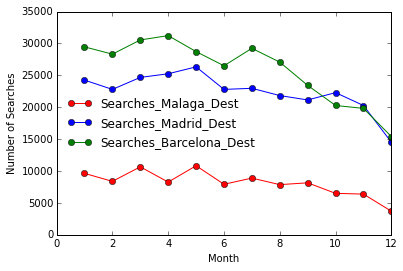

In [31]:
plt.plot(tbl_Malaga.index, tbl_Malaga.values, 'o-', color='r', label='Searches_Malaga_Dest')
plt.plot(tbl_Madrid.index, tbl_Madrid.values, 'o-', color='b', label='Searches_Madrid_Dest')
plt.plot(tbl_Barcelona.index, tbl_Barcelona.values, 'o-', color='g', label='Searches_Barcelona_Dest')
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.legend(frameon=False, loc='best')
plt.show()